In [16]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [3]:
data = pd.read_excel("title_author_uni_country_sql.xlsx")

Between the years 2003 and 2021, keywords were present in around 50% of the paper

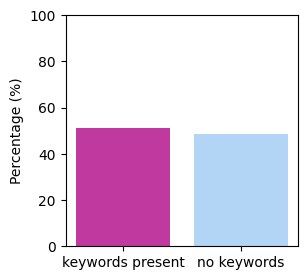

In [4]:
titles = data.groupby('title').agg({
    'author': list,
    'country': list,
    'university': list,
    'keywords_dummi': 'first',
    'keywords': 'first',  
    'year': 'first'      
}).reset_index()
 
kw_yes = (titles['keywords_dummi'] == 1).sum() / len(titles) * 100
kw_no = (titles['keywords_dummi'] == 0).sum() / len(titles) * 100

plt.figure(figsize=(3, 3))
plt.bar(['keywords present', 'no keywords'], [kw_yes, kw_no], color=['#BF399E', '#b2d4f5'])
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  
plt.show()

There is a positive trend in the presence of the 'Keywords' section in papers over the years: 20% only in 2004 and increasing to 75% in 2021

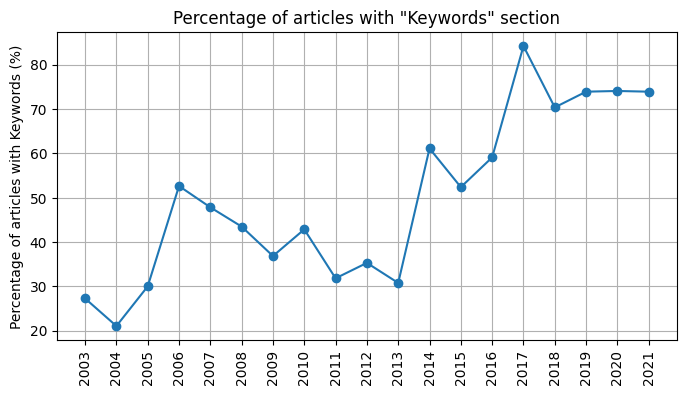

In [5]:
titles_year = titles.groupby('year')
keywords_year = (titles_year['keywords_dummi'].sum() / titles_year['year'].count()) * 100

plt.figure(figsize=(8, 4))
plt.plot(keywords_year.index, keywords_year.values, marker='o', linestyle='-')
#plt.xlabel('Year')
plt.ylabel('Percentage of articles with Keywords (%)')
plt.title('Percentage of articles with "Keywords" section')
plt.xticks(keywords_year.index, rotation=90)
plt.grid(True)
plt.show()

There are a total of 598 unique keywords or keyword phrases found over the course of 19 years

In [6]:
keywords = titles['keywords'].str.split(',').explode().str.strip()
keywords = keywords.str.replace('\n', ' ', regex=False).str.replace('\t', ' ', regex=False).str.replace('.', '', regex=False)
keywords = keywords.str.lower()
keywords = keywords.dropna()

# There are 2 keywords where keeping a dot is neccessary
keywords = keywords.replace({'bpmn 20': 'bpmn 2.0', 'industry 40': 'industry 4.0'})
keywords = keywords.reset_index(drop=True)

# Get unique keywords and their frequencies
unique_keywords = keywords.unique()
unique_kw_number = len(unique_keywords)
print(f"Unique keywords number: {unique_kw_number}")

keyword_frequencies = keywords.value_counts().reset_index()
keyword_frequencies.columns = ['Keyword', 'Frequency']
print(keyword_frequencies.head(17))
keyword_frequencies.to_excel('keyword_frequencies.xlsx', index=False)

Unique keywords number: 598
                                         Keyword  Frequency
0                                 process mining         52
1                    business process management         16
2                           conformance checking         12
3                                     petri nets         12
4                      business process modeling         11
5                                           bpmn         11
6                              process discovery         10
7                                     case study          9
8         business process modeling and analysis          6
9                                            bpm          5
10                    robotic process automation          5
11                                      workflow          5
12           process verification and validation          5
13                           process improvement          4
14  formal models in business process management          4
15          

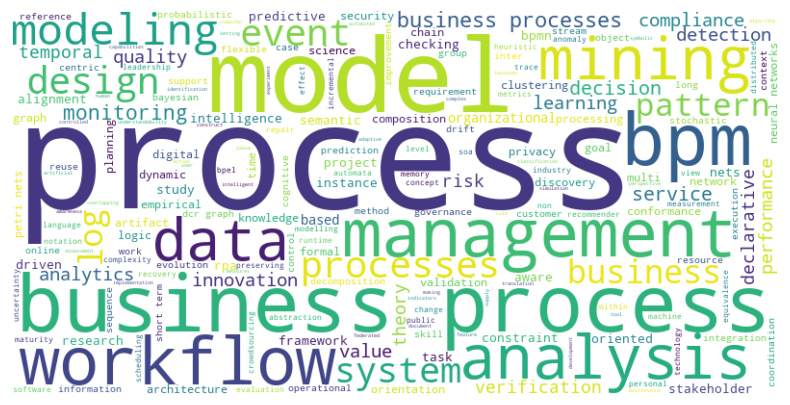

In [7]:
#wordcloud
keywords_c = keyword_frequencies['Keyword']
text_keywords = " ".join(keywords_c)
wordcloud_kw = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_kw, interpolation='bilinear')
plt.axis("off")
plt.show()

When analyzing keywords by year, it becomes evident that in earlier years, more specific keywords were prevalent. In contrast, as we approach 2021, we observe a trend towards the use of more general keywords such as "process mining." However, this shift could be attributed to a general increase in the overall prevalence of keywords in articles during this time period.

In [8]:
kw_by_year = []
titles_year = titles.groupby('year')

for year, group in titles_year:
    year_keywords = group['keywords'].str.split(',').explode().str.strip()
    year_keywords = year_keywords.str.replace('\n', ' ', regex=False).str.replace('\t', ' ', regex=False).str.replace('.', '', regex=False)
    year_keywords = year_keywords.str.lower()
    year_keywords = year_keywords.dropna()

    year_keywords = year_keywords.replace({'bpmn 20': 'bpmn 2.0', 'industry 40': 'industry 4.0'})
    year_unique_keywords = year_keywords.unique()
    year_keyword_frequencies = year_keywords.value_counts().reset_index()
    year_keyword_frequencies.columns = ['Keyword', 'Frequency']
    year_keyword_frequencies['Year'] = year
    kw_by_year.append(year_keyword_frequencies)

keyword_frequencies_by_year = pd.concat(kw_by_year, ignore_index=True)
keyword_frequencies_by_year.to_excel('KeywordFrequenciesByYear.xlsx', index=False)


Universities 

In [9]:
orgs = data.groupby('title')['university'].apply(lambda x: ', '.join(set(x.str.split(', ').sum()))).reset_index()
orgs['organizations'] = orgs['university'].str.split(', ').apply(lambda x: ', '.join(set(x)))

# Count the occurrences of each organization
organization_counts = orgs['organizations'].str.split(', ').explode().value_counts().reset_index()
organization_counts.columns = ['organizations', 'count']
total_orgs = organization_counts.shape[0]

# Print the result
print(f"Total number of universities and other organisations involved: {total_orgs}")
display(organization_counts.head(50))


Total number of universities and other organisations involved: 283


,organizations,count
0,Eindhoven University of Technology,75
1,Queensland University of Technology,40
2,University of Tartu,28
3,University of Potsdam,21
4,Universitat Politecnica de Catalunya,17
5,Free University of Bozen-Bolzano,17
6,Vienna University of Economics and Business Ad...,17
7,Israel Institute of Technology,13
8,Humboldt-University,13
9,IBM T.J. Watson Research Center,10


In [12]:
def unique_list(series):
    return list(set(series))

# Group by 'title' and aggregate using custom functions
uni = data.groupby('title').agg({
    'university': unique_list,
    'year': 'first'
}).reset_index()

# Explode the 'university' column to create separate rows
uni = uni.explode('university')

# Reset the index to ensure a continuous index
uni.reset_index(drop=True, inplace=True)

# Rename the 'value' column to 'university'
uni.rename(columns={'university': 'university'}, inplace=True)

# Define the Excel file name
excel_file_name = 'uni_long_data.xlsx'

# Write the DataFrame to an Excel file
uni.to_excel(excel_file_name, index=False)

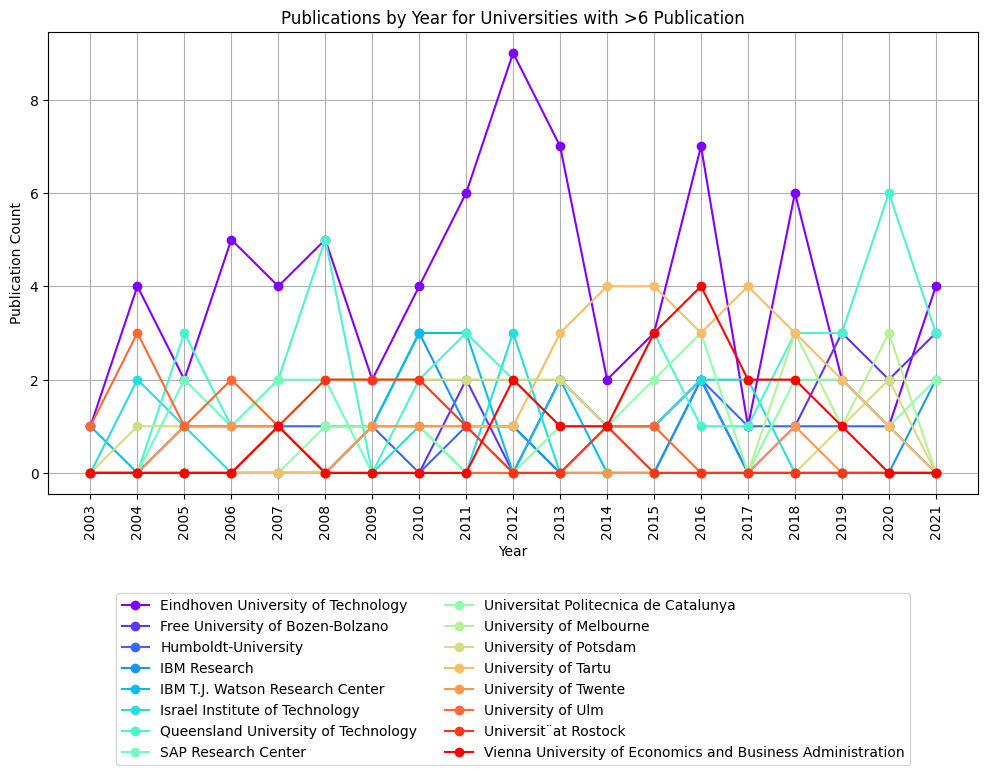

In [21]:
grouped_data = uni.groupby(['year', 'university']).size().unstack(fill_value=0)
# print(grouped_data)

# Filter universities with total publications more than 6
filtered_data = grouped_data.loc[:, grouped_data.sum(axis=0) > 6]

university_colors = {}
unique_colors = plt.cm.rainbow(np.linspace(0, 1, len(filtered_data.columns)))  

plt.figure(figsize=(12, 6))
for idx, university in enumerate(filtered_data.columns):
    color = unique_colors[idx]
    university_colors[university] = color
    plt.plot(filtered_data.index, filtered_data[university], marker='o', label=university, color=color)


plt.title('Publications by Year for Universities with >6 Publication')
plt.xlabel('Year')
plt.xticks(filtered_data.index, rotation=90)
plt.ylabel('Publication Count')
plt.legend()
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

It's interesting to observe a general trend in which the publication dynamics for each university do not follow a linear path. Instead, they resemble a "fence," with periods of increased publications occurring every 2-4 years.

In [26]:
data_byAuthor = data.groupby('author')['title'].nunique()
data_byAuthor = data_byAuthor.sort_values(ascending=False)
top_authors = data_byAuthor[data_byAuthor > 4]

print(top_authors)

author
Wil M.P. van der Aalst       33
Marlon Dumas                 22
Hajo A. Reijers              21
Jan Mendling                 19
Fabrizio Maria Maggi         17
Marco Montali                16
Josep Carmona                15
Marcello La Rosa             14
Mathias Weske                14
Matthias Weidlich            13
Dirk Fahland                 12
Luciano García-Bañuelos      10
Ingo Weber                    9
Stefanie Rinderle-Ma          9
Niels Lohmann                 8
Manfred Reichert              8
Remco Dijkman                 8
Hagen Völzer                  8
Massimiliano de Leoni         7
Avigdor Gal                   7
Arik Senderovich              7
Arthur H.M. ter Hofstede      7
Wasana Bandara                6
Tijs Slaats                   6
Boudewijn van Dongen          6
Chiara Di Francescomarino     6
Barbara Weber                 6
Michael Rosemann              5
Maximilian Röglinger          5
Schahram Dustdar              5
Kees van Hee                  5
A

In [37]:
#check only for the top authors 
filtered_data = data[data['author'].isin(top_authors.index)]
people_uni = filtered_data.groupby('author')['university'].unique().apply(lambda x: ', '.join(x)).reset_index()
file_path = 'author_uni.xlsx'
people_uni.to_excel(file_path, index=False)
unique_uni = people_uni['university'].unique()
unique_uni = [uni.replace("'", '').split(', ') for uni in unique_uni]
unique_universities = set(uni for unis in unique_uni for uni in unis)

In [36]:
org_count_filtered = organization_counts[organization_counts['organizations'].isin(unique_universities)]
print(org_count_filtered)

                                         organizations  count
0                   Eindhoven University of Technology     75
1                  Queensland University of Technology     40
2                                  University of Tartu     28
3                                University of Potsdam     21
4                 Universitat Politecnica de Catalunya     17
5                     Free University of Bozen-Bolzano     17
6    Vienna University of Economics and Business Ad...     17
7                       Israel Institute of Technology     13
8                                  Humboldt-University     13
10                                   University of Ulm     10
11                                        IBM Research     10
12                                Universit¨at Rostock      9
14                                University of Twente      7
15                             University of Melbourne      7
16                      IBM Zurich Research Laboratory      6
18      

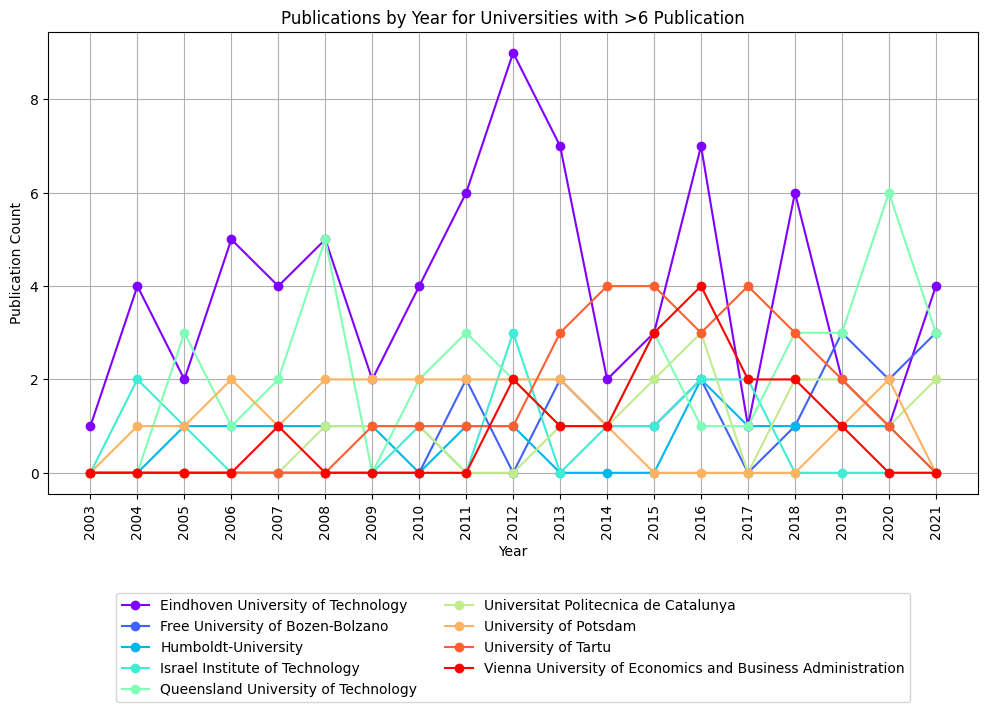

In [47]:
filtered_data = uni[uni['university'].isin(org_count_filtered.index)]
grouped_data = uni.groupby(['year', 'university']).size().unstack(fill_value=0)
# Filter universities with total publications more than 5
filtered_data = grouped_data.loc[:, grouped_data.sum(axis=0) > 10]
# print(filtered_data)


university_colors = {}
unique_colors = plt.cm.rainbow(np.linspace(0, 1, len(filtered_data.columns)))  

plt.figure(figsize=(12, 6))
for idx, university in enumerate(filtered_data.columns):
    color = unique_colors[idx]
    university_colors[university] = color
    plt.plot(filtered_data.index, filtered_data[university], marker='o', label=university, color=color)


plt.title('Publications by Year for Universities with >6 Publication')
plt.xlabel('Year')
plt.xticks(filtered_data.index, rotation=90)
plt.ylabel('Publication Count')
plt.legend()
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

No significant results indicate a significant increase in publications due to the transfer of key researchers to other universities. However, there is a surge in publications at Vienna University of Economics and Business Administration, the University of Tartu and Free University of Bozen-Bolzano. Investigating this surge could yield valuable insights, especially regarding any potential influence from Jan Mendling, Marlon Dumas, Fabrizio Maria Maggi who may have joined these institutions. While the evidence is not conclusive, it suggests a plausible connection.